## Background

Innovation drives the economy, and of the main contributors are those that reside in the academe. 

This data story aims to seek the understand the influence of educational institutions that are part of the Times Higher Education World University Rankings in the innovation index. The Global Innovation Index of 2022 is primarily scored based on the innovation input index and the innovation output index. 

The following questions will be answered throughout the exploration on data given by the Times Higher Education World University Rankings and the Global Innovation Index:
- How many universities are present in each country found in the THE World University Rankings?
- Is the median score of all of the universities in one country correlated with the country' ranking in the Global Innovation Index, focusing on the following criteria:
    - scores_teaching: Teaching score - learning environment score
    - scores_research: Research score - volume, incode and reputation of University
    - scores_citations: Citations score - research influence of University
    
The following scores from the dataset were chosen for data exploration since this are activities related to innovation output. 


## Methodology

This data story will make use of two datasets: 
- uni_rank.csv - Shows the THE World University Rankings
- inno_index.csv - Shows the Global Innovation Ranking of each country observed

Universities of the same country will be also analyzed by the median so that it takes into consideration that data is asymmetric. These values will be compared against their respective country's rank to see if there is a correlation present. 

## Setting up the data

*Import the libraries and the data that will be used*

In [599]:
import pandas as pd
import matplotlib.pyplot as plt

In [600]:
wipo_index = pd.read_csv("inno_index.csv")
ranking = pd.read_csv("uni_rank.csv")

*Replace headings of wipo_index.csv to 'location' instead of 'Economy*

In [601]:
wipo_index.rename(columns={'Economy':'location'}, inplace=True)
wipo_index.head()

,rank,location,Income Group(Strength/Weakness),Strength / Weakness,Score
0,1,Switzerland,Strength,Strength,64.6
1,2,United States of America,Strength,Strength,61.8
2,3,Sweden,Strength,Strength,61.6
3,4,United Kingdom,Strength,Strength,59.7
4,5,Netherlands,NaN,Strength,58.0


In [602]:
ranking.head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,96.4,10,92.3,5,99.7,1,99.0,...,28,United Kingdom,"20,965",10.6,42%,48 : 52,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,Harvard University,95.2,20,94.8,1,99.0,3,99.3,...,214,United States,"21,887",9.6,25%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
2,30,=3,University of Cambridge,94.8,30,90.9,7,99.5,2,97.0,...,34,United Kingdom,"20,185",11.3,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
3,40,=3,Stanford University,94.8,40,94.2,2,96.7,7,99.8,...,223,United States,"16,164",7.1,24%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,50,5,Massachusetts Institute of Technology,94.2,50,90.7,8,93.6,11,99.8,...,119,United States,"11,415",8.2,33%,40 : 60,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


*Create new dataframe wherein the ranking.csv dataset has only the following: rank, name, scores_teaching, location of all of the schools listed.*

In [603]:
rdf = pd.DataFrame(ranking[['rank','location','scores_teaching','name']])
rdf['rank'] = rdf['rank'].str.replace('\W', '', regex=True)
rdf.tail()

,rank,location,scores_teaching,name
2340,Reporter,United Kingdom,NaN,York St John University
2341,Reporter,Nigeria,NaN,"Yusuf Maitama Sule University, Kano"
2342,Reporter,Ukraine,NaN,Zhytomyr Polytechnic State University
2343,Reporter,Pakistan,NaN,Ziauddin University
2344,Reporter,Jordan,NaN,Zarqa University


*Ensure there are no duplicates or typos in 'location' in the ranking.csv file when compared with wipo_index.csv file*

In [604]:
rdf = rdf.replace({'location':{"C?te d'Ivoire" : "Cote d'Ivoire",
                            'Iran (Islamic Republic of)' : 'Iran',
                            'Republic of Moldova' : 'Moldova',
                            'Republic of Korea': 'South Korea',
                            'T\x81rkiye' : 'Turkey',
                            'United States of America':'United States',
                            'Viet Nam':'Vietnam'
    
                            }})
pd.unique(rdf['location'])

rdfloc = pd.unique(rdf['location'])
rdfloc.sort()
print(rdfloc)

['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Cambodia' 'Canada' 'Chile' 'China'
 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Denmark' 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait'
 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg' 'Macao'
 'Malawi' 'Malaysia' 'Malta' 'Mauritius' 'Mexico' 'Moldova' 'Mongolia'
 'Montenegro' 'Morocco' 'Mozambique' 'Namibia' 'Nepal' 'Netherlands'
 'New Zealand' 'Nigeria' 'Northern Cyprus' 'Norway' 'Oman' 'Pakistan'
 'Palestine' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Romania' 'Russian Federation' 'Saudi Arabia'
 'Serbia' 'Singapore' 'Slovakia' 'Slove

*Each of the university has a score for teaching environment which will contribute to the mean of their country. However, not all countries are present in the university world rankings, therefore must be removed.*  

## Country Overview

This shows how many universities are present in THE World University Rankings per country.

Text(0, 0.5, 'No. of Universities')

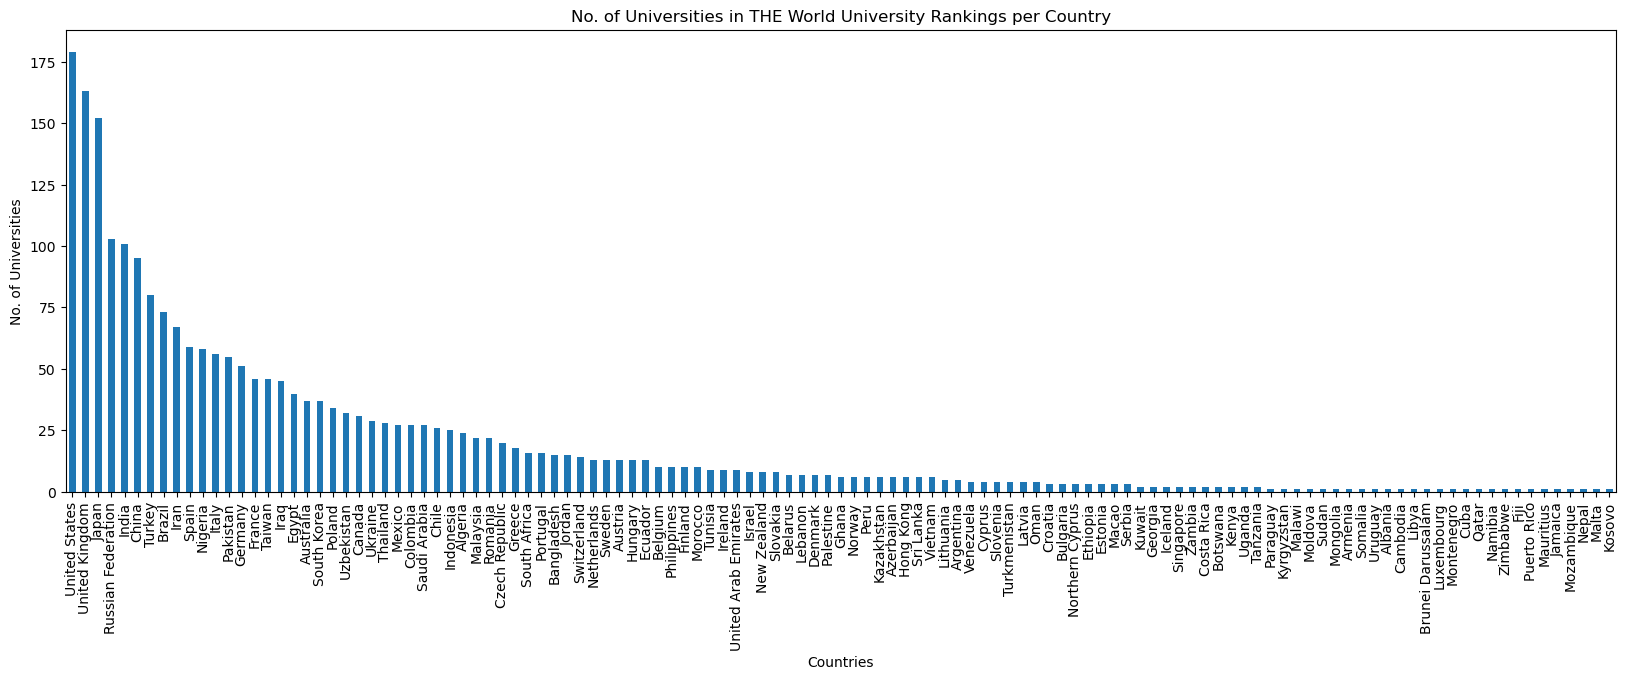

In [605]:
country_plot = rdf['location'].value_counts()
country_plot.plot.bar(subplots=True, figsize=(20, 6))
plt.title("No. of Universities in THE World University Rankings per Country")
plt.xlabel("Countries")
plt.ylabel("No. of Universities")

## Getting the mean of each country in terms of teaching score

In [606]:
country = []
median = []

for x in rdfloc:
    ave = rdf.loc[rdf['location'] == x, 'scores_teaching'].median()
    ave = round(ave, 2)
    country.append(x)
    median.append(ave)


finaldf = pd.DataFrame(columns = ["location","median"])
finaldf['location'] = country
finaldf['median'] = median
finaldf.dropna(inplace = True)
finaldf.tail()


,location,median
112,United States,36.80
115,Venezuela,15.90
116,Vietnam,14.65
117,Zambia,15.70
118,Zimbabwe,14.80


*Get the innovation ranking of each country present in THE World University Rankings by creating a dataframe of the wipo_index.csv file*

In [607]:
wipodf = pd.DataFrame(wipo_index[['rank','location']])
wipodf = wipodf.replace({'location':{"C?te d'Ivoire" : "Cote d'Ivoire",
                            'Iran (Islamic Republic of)' : 'Iran',
                            'Republic of Moldova' : 'Moldova',
                            'Republic of Korea': 'South Korea',
                            'T\x81rkiye' : 'Turkey',
                            'United States of America':'United States',
                            'Viet Nam':'Vietnam'
    
                            }})
wipodf.head()


,rank,location
0,1,Switzerland
1,2,United States
2,3,Sweden
3,4,United Kingdom
4,5,Netherlands


In [608]:
pd.merge(finaldf, wipodf, on = 'location')

,location,median,rank
0,Algeria,18.90,115
1,Argentina,18.20,69
2,Australia,25.90,25
3,Austria,30.95,17
4,Azerbaijan,16.50,93
...,...,...,...
89,United Kingdom,24.30,4
90,United States,36.80,2
91,Vietnam,14.65,48
92,Zambia,15.70,118


In [609]:
adf = pd.merge(finaldf, wipodf, on = 'location')
adf = pd.DataFrame(pd.merge(finaldf, wipodf, on = 'location'))
adf.sort_values(by=['rank'])

,location,median,rank
82,Switzerland,35.25,1
90,United States,36.80,2
81,Sweden,29.70,3
89,United Kingdom,24.30,4
59,Netherlands,43.20,5
...,...,...,...
24,Ethiopia,17.15,117
92,Zambia,15.70,118
86,Uganda,21.80,119
56,Mozambique,12.10,123


In [610]:
adf.corr(numeric_only = True)

,median,rank
median,1.000000,-0.585637
rank,-0.585637,1.000000


### Visualization of the country's innovation ranking against the teaching score of the universities within that country

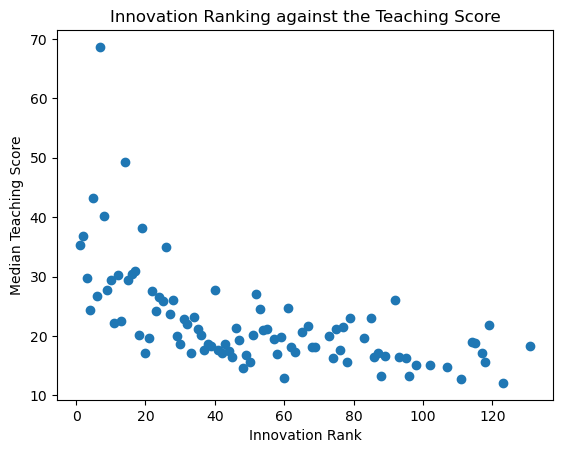

In [611]:
plt.scatter(adf['rank'], adf['median'])
plt.xlabel("Innovation Rank")
plt.ylabel("Median Teaching Score")
plt.title("Innovation Ranking against the Teaching Score")
plt.show()

**Initial Analysis**: There is a inverse correlation between the innovation rank and the median teaching score of the country. This suggests that the improvement of the teaching score will lead to a higher ranking in the Global Innovation Index. 

## Getting the median of each country in terms of research score


In [612]:
resdf = pd.DataFrame(ranking[['rank','location','scores_research','name']])
resdf['rank'] = resdf['rank'].str.replace('\W', '', regex=True)
resdf.dropna(inplace = True)
resdf.tail()

,rank,location,scores_research,name
1794,1501,Japan,12.3,Yamaguchi University
1795,1501,China,10.9,Yanshan University
1796,1501,Turkey,12.2,Yeditepe University
1797,1501,Russian Federation,8.9,Yuri Gagarin State Technical University of Sar...
1798,1501,Turkey,8.2,Zonguldak Bülent Ecevit University


In [613]:
resdfloc = pd.unique(resdf['location'])
resdfloc.sort()
print(resdfloc)

['Algeria' 'Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Belgium' 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czech Republic' 'Denmark' 'Ecuador' 'Egypt' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kuwait' 'Latvia' 'Lebanon' 'Lithuania' 'Luxembourg' 'Macao'
 'Malaysia' 'Malta' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nigeria'
 'Northern Cyprus' 'Norway' 'Oman' 'Pakistan' 'Palestine' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Puerto Rico' 'Qatar' 'Romania'
 'Russian Federation' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia'
 'Slovenia' 'South Africa' 'South Korea' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Taiwan' 'Tanzania' 'Thai

In [614]:
country2 = []
median2 = []

for x in resdfloc:
    ave = resdf.loc[resdf['location'] == x, 'scores_research'].median()
    ave = round(ave, 2)
    country2.append(x)
    median2.append(ave)


finalresdf = pd.DataFrame(columns = ["location","median"])
finalresdf['location'] = country2
finalresdf['median'] = median2
finalresdf.head()

,location,median
0,Algeria,8.30
1,Argentina,10.20
2,Australia,33.10
3,Austria,28.85
4,Azerbaijan,7.80


In [615]:
a2df.sort_values(by=['median'])

,location,median,rank
4,Azerbaijan,7.80,93
58,Nepal,7.90,111
57,Namibia,8.00,96
0,Algeria,8.30,115
56,Mozambique,8.40,123
...,...,...,...
81,Sweden,43.60,3
7,Belgium,43.85,26
59,Netherlands,57.10,5
31,Hong Kong,59.05,14


In [616]:
a2df.corr(numeric_only = True)

,median,rank
median,1.000000,-0.591913
rank,-0.591913,1.000000


### Visualization of the country's innovation ranking against the research score of the universities within that country

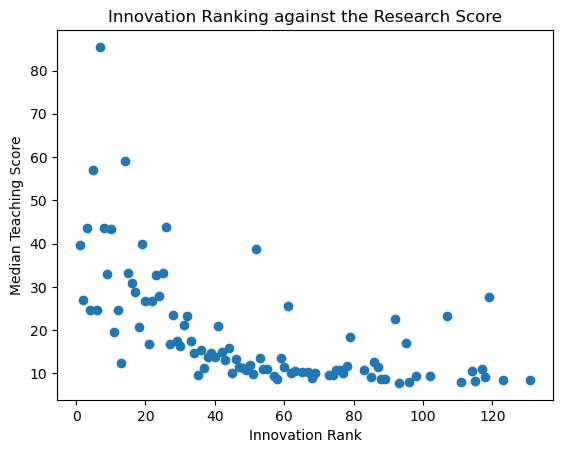

In [617]:
plt.scatter(a2df['rank'], a2df['median'])
plt.xlabel("Innovation Rank")
plt.ylabel("Median Teaching Score")
plt.title("Innovation Ranking against the Research Score")
plt.show()

**Initial Analysis**: There is a inverse correlation between the innovation rank and the median research score of the country. This suggests that the improvement of the research score will lead to a higher ranking in the Global Innovation Index. 

## Getting the median of each country in terms of citation score

In [618]:
citdf = pd.DataFrame(ranking[['rank','location','scores_citations','name']])
citdf['rank'] = resdf['rank'].str.replace('\W', '', regex=True)
citdf.reset_index(inplace=True)
citdf.dropna(inplace=True)
citdf.tail()

,index,rank,location,scores_citations,name
1794,1794,1501,Japan,13.9,Yamaguchi University
1795,1795,1501,China,18.3,Yanshan University
1796,1796,1501,Turkey,10.5,Yeditepe University
1797,1797,1501,Russian Federation,7.2,Yuri Gagarin State Technical University of Sar...
1798,1798,1501,Turkey,23.5,Zonguldak Bülent Ecevit University


In [619]:
citdfloc = pd.unique(citdf['location'])
citdfloc.sort()
print(citdfloc)


['Algeria' 'Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Belgium' 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czech Republic' 'Denmark' 'Ecuador' 'Egypt' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kuwait' 'Latvia' 'Lebanon' 'Lithuania' 'Luxembourg' 'Macao'
 'Malaysia' 'Malta' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nigeria'
 'Northern Cyprus' 'Norway' 'Oman' 'Pakistan' 'Palestine' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Puerto Rico' 'Qatar' 'Romania'
 'Russian Federation' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia'
 'Slovenia' 'South Africa' 'South Korea' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Taiwan' 'Tanzania' 'Thai

In [620]:
country3 = []
median3 = []

for x in citdfloc:
    ave = citdf.loc[citdf['location'] == x, 'scores_citations'].median()
    ave = round(ave, 2)
    country3.append(x)
    median3.append(ave)


finalcitdf = pd.DataFrame(columns = ["location","median"])
finalcitdf['location'] = country3
finalcitdf['median'] = median3
finalcitdf.tail()

,location,median
99,United States,69.8
100,Venezuela,8.9
101,Vietnam,33.3
102,Zambia,96.8
103,Zimbabwe,35.6


In [621]:
a3df = pd.merge(finalcitdf, wipodf, on = 'location')
a3df = pd.DataFrame(pd.merge(finalcitdf, wipodf, on = 'location'))
a3df.sort_values(by=['rank'])

,location,median,rank
82,Switzerland,83.75,1
90,United States,69.80,2
81,Sweden,78.00,3
89,United Kingdom,72.60,4
59,Netherlands,86.60,5
...,...,...,...
24,Ethiopia,89.75,117
92,Zambia,96.80,118
86,Uganda,34.50,119
56,Mozambique,89.40,123


In [622]:
a3df.corr(numeric_only = True)

,median,rank
median,1.00000,-0.16005
rank,-0.16005,1.00000


### Visualization of the country's innovation ranking against the citation score of the universities within that country

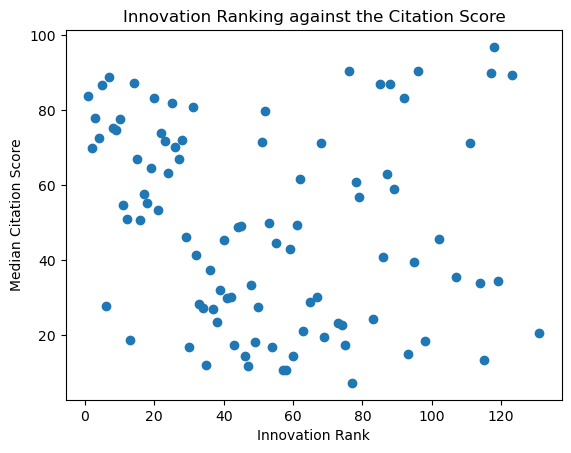

In [623]:
plt.scatter(a3df['rank'], a3df['median'])
plt.xlabel("Innovation Rank")
plt.ylabel("Median Citation Score")
plt.title("Innovation Ranking against the Citation Score")
plt.show()

**Initial Analysis**: There is no correlation present between the innovation ranking and the median citation score of a country.

## Conclusion

The teaching score can improve by country which can lead to an improve ranking in the Global Innovation Index. Providing students and researchers the space needed for innovation is a crucial as it fosters a culture pushing for national development as well. The same can be said with the research score of each country. Research outputs is a relevant indicator for a country's participation in innovation. Therefore, countries, especially those who reside in developing countries must look into a more active participation in research and development to improve their innovation ranking. 

Moreover, the citation score shows no correlation with the innovation ranking of a country which can suggest that the participation of knowledge transfer is an activity that is already expected of each country or academic institution. Making use of that knowledge does not translate in this criteria. 

A country's rate of innovation is dependent on the active participation of its education system. 


## Recommendations

It would be intersting to incorporate socio-economic factors such as income group in future analysis. This may uncover suggestions for developing countries to create policies that places an emphasis on research and development towards innovation. 